<a href="https://colab.research.google.com/github/fatisa2000/ml_project/blob/main/phase2_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
from keras.datasets import mnist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import files
from google.colab.patches import cv2_imshow
from sklearn.mixture import GaussianMixture
from skimage.util import view_as_windows
import os
from zipfile import ZipFile
from scipy.ndimage import gaussian_filter
from PIL import Image
import io
import zipfile
from skimage import io
from sklearn.model_selection import train_test_split

In [137]:
#patch_size=8
lisa=[]
import io
# Open the zip file
with zipfile.ZipFile('corrupted.zip', 'r') as zip_ref:
    # Loop over all files in the zip archive
    for filename in zip_ref.namelist():
        # Check if the file is an image file
        if filename.endswith('.png') or filename.endswith('.jpg') or filename.endswith('.jpeg'):
            # Read the contents of the image file into a bytes object
            with zip_ref.open(filename, 'r') as file:
                img_bytes = file.read()

                # Load the image from the bytes object
                img = Image.open(io.BytesIO(img_bytes))
                arr=np.array(img)
                #print(arr)
                lisa.append(arr)


                # Display the image
                #img.show()
y1=np.array(lisa)

In [138]:
lisa1=[]
import io
# Open the zip file
with zipfile.ZipFile('original.zip', 'r') as zip_ref:
    # Loop over all files in the zip archive
    for filename in zip_ref.namelist():
        # Check if the file is an image file
        if filename.endswith('.png') or filename.endswith('.jpg') or filename.endswith('.jpeg'):
            # Read the contents of the image file into a bytes object
            with zip_ref.open(filename, 'r') as file:
                img_bytes = file.read()

                # Load the image from the bytes object
                img = Image.open(io.BytesIO(img_bytes))
                arr=np.array(img)
                #print(arr)
                lisa1.append(arr)


                # Display the image
                #img.show()
x_train=np.array(lisa1)

In [139]:
lisc=[]
import io
# Open the zip file
with zipfile.ZipFile('corrupted_test.zip', 'r') as zip_ref:
    # Loop over all files in the zip archive
    for filename in zip_ref.namelist():
        # Check if the file is an image file
        if filename.endswith('.png') or filename.endswith('.jpg') or filename.endswith('.jpeg'):
            # Read the contents of the image file into a bytes object
            with zip_ref.open(filename, 'r') as file:
                img_bytes = file.read()

                # Load the image from the bytes object
                img = Image.open(io.BytesIO(img_bytes))
                arr=np.array(img)
                #print(arr)
                lisc.append(arr)


                # Display the image
                #img.show()
yt=np.array(lisc)

<ipython-input-58-5b143fd7120a>:22: RuntimeWarning: invalid value encountered in true_divide
  reconstructed_image /= count_map


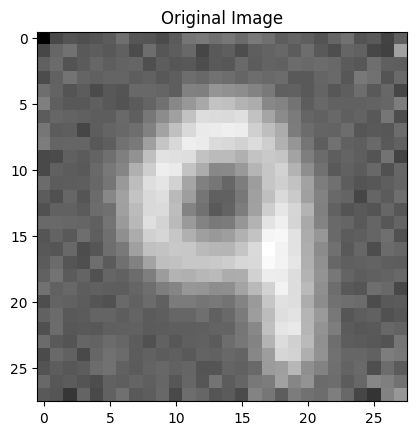

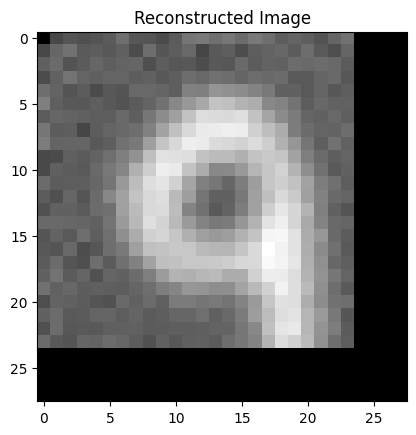

In [58]:

patch_size = (8, 8)  # Specify the desired patch size
step_size = patch_size[0]
image_array=lisa[1]
# Extract patches
paches = []
for i in range(0, image_array.shape[0] - patch_size[0] + 1, step_size):
    for j in range(0, image_array.shape[1] - patch_size[1] + 1, step_size):
        patch = image_array[i:i+patch_size[0], j:j+patch_size[1]]
        paches.append(patch)

# Reconstruct the image using the extracted patches
reconstructed_image = np.zeros_like(image_array)
count_map = np.zeros_like(image_array, dtype=int)

for i, patch in enumerate(paches):
    x = (i // ((image_array.shape[1] - patch_size[1]) // step_size + 1)) * step_size
    y = (i % ((image_array.shape[1] - patch_size[1]) // step_size + 1)) * step_size
    reconstructed_image[x:x+patch_size[0], y:y+patch_size[1]] += patch
    count_map[x:x+patch_size[0], y:y+patch_size[1]] += 1

reconstructed_image = reconstructed_image.astype(float)
reconstructed_image /= count_map
# Display the original and reconstructed images
plt.imshow(lisa[1], cmap='gray')
plt.title('Original Image')
plt.show()

plt.imshow(reconstructed_image.astype(np.uint8), cmap='gray')
plt.title('Reconstructed Image')
plt.show()

In [70]:
def compute_log_likelihood(X, gmm):          #Q2
    return np.sum(np.log(np.sum(gmm.predict_proba(X), axis=1)))

# Function to train the GMM using the EM algorithm
def train_gmm1(K, patch_size,patches):


    gmm = GaussianMixture(n_components=K, covariance_type='full', random_state=0)

    gmm.fit(patches)

    print("Log-Likelihood (Training):", compute_log_likelihood(patches, gmm))

    return gmm

In [60]:
def select_optimal_k(max_k, val_patches,patch_size,patches):
    best_k = None
    best_likelihood = float('-inf')

    for k in range(1, max_k+1):
        gmm = train_gmm1(k, patch_size,patches)
        likelihood = compute_log_likelihood(val_patches, gmm)
        print("Log-Likelihood (Validation) for K =", k, ":", likelihood)

        if likelihood > best_likelihood:
            best_likelihood = likelihood
            best_k = k

    return best_k

In [61]:
patch_size=8
train_patches = get_patches(x_train, patch_size)
train_patches1=train_patches.reshape(train_patches.shape[0],train_patches.shape[1]**2)
# Select the optimal K using the validation set
max_k = 10  # Maximum value of K to consider
train_data, val_data = train_test_split(train_patches1, test_size=0.2, random_state=42)
best_k = select_optimal_k(max_k,val_data,patch_size,train_data)
print(best_k)
# Train the GMM with the optimal K on the entire dataset
gmm = train_gmm1(best_k, patch_size,train_data)

Log-Likelihood (Training): 0.0
Log-Likelihood (Validation) for K = 1 : 0.0
Log-Likelihood (Training): 0.0
Log-Likelihood (Validation) for K = 2 : 4.440892098500617e-15
Log-Likelihood (Training): 4.60742555219432e-14
Log-Likelihood (Validation) for K = 3 : -2.498001805406621e-14
Log-Likelihood (Training): -2.2315482794988795e-14
Log-Likelihood (Validation) for K = 4 : 3.5194069880607687e-14
Log-Likelihood (Training): 1.0547118733938513e-13
Log-Likelihood (Validation) for K = 5 : -5.129230373768333e-14
Log-Likelihood (Training): 5.131450819817261e-13
Log-Likelihood (Validation) for K = 6 : -2.8310687127942623e-13
Log-Likelihood (Training): -8.826273045771514e-14
Log-Likelihood (Validation) for K = 7 : -8.726352973554561e-14
Log-Likelihood (Training): 1.0369483049997374e-13
Log-Likelihood (Validation) for K = 8 : -5.961897642238299e-14
Log-Likelihood (Training): 3.551603455775783e-13
Log-Likelihood (Validation) for K = 9 : 1.2612133559740854e-13
Log-Likelihood (Training): 3.76365605347896

In [71]:
#Q1
def get_patches(images, patch_size):
    num_images = len(images)
    patches_per_image = (28 // patch_size) ** 2
    num_patches = num_images * patches_per_image
    patches = np.zeros((num_patches, patch_size, patch_size))

    patch_idx = 0
    for image in images:
        for i in range(0, 28 - patch_size + 1, patch_size):
            for j in range(0, 28 - patch_size + 1, patch_size):
                patch = image[i:i+patch_size, j:j+patch_size].copy()
                patches[patch_idx] = patch
                patch_idx += 1

    return patches

In [64]:
#Q3
def train_gmm(patches, n_components):
    patches_reshaped = patches.reshape(patches.shape[0], -1)
    covariance_matrix = np.cov(patches_reshaped.T)
    # Ensure that the covariance matrix is positive semidefinite
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    eigenvalues[eigenvalues < 0] = 0
    covariance_matrix_psd = eigenvectors @ np.diag(eigenvalues) @ eigenvectors.T

    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
    gmm.covariances_ = np.tile(covariance_matrix_psd, (n_components, 1, 1))

    gmm.fit(patches_reshaped)
    return gmm



In [65]:
def denoise_patches(patches, gmm):
    means = gmm.means_
    num_patches = patches.shape[0]
    patches_reshaped = patches.reshape(num_patches, -1)

    denoised_patches = np.zeros_like(patches_reshaped)
    component_probabilities = gmm.predict_proba(patches_reshaped)
    closest_component = np.argmax(component_probabilities, axis=1)

    for i in range(num_patches):
        denoised_patches[i] = means[closest_component[i]]

    denoised_patches_reshaped = denoised_patches.reshape(patches.shape)
    return denoised_patches_reshaped

In [66]:
def reshape_patches(patches, patch_size):
    num_patches = patches.shape[0]
    patches_reshaped = patches.reshape(num_patches, patch_size, patch_size)
    return patches_reshaped

In [97]:
def reconstruct_images(patches, image_shape, patch_size):
    num_patches = patches.shape[0]
    num_images = num_patches // ((image_shape[0] // patch_size) ** 2)

    reconstructed_images = np.zeros((num_images,) + image_shape)
    count_map = np.zeros(image_shape)

    step_size = patch_size

    patch_idx = 0
    for image_idx in range(num_images):
        for i in range(0, image_shape[0] - patch_size + 1, step_size):
            for j in range(0, image_shape[1] - patch_size + 1, step_size):
                reconstructed_images[image_idx, i:i+patch_size, j:j+patch_size] += patches[patch_idx]
                count_map[i:i+patch_size, j:j+patch_size] += 1
                patch_idx += 1

    reconstructed_images /= count_map

    return reconstructed_images

<ipython-input-67-f646771c4acc>:18: RuntimeWarning: invalid value encountered in true_divide
  reconstructed_images /= count_map


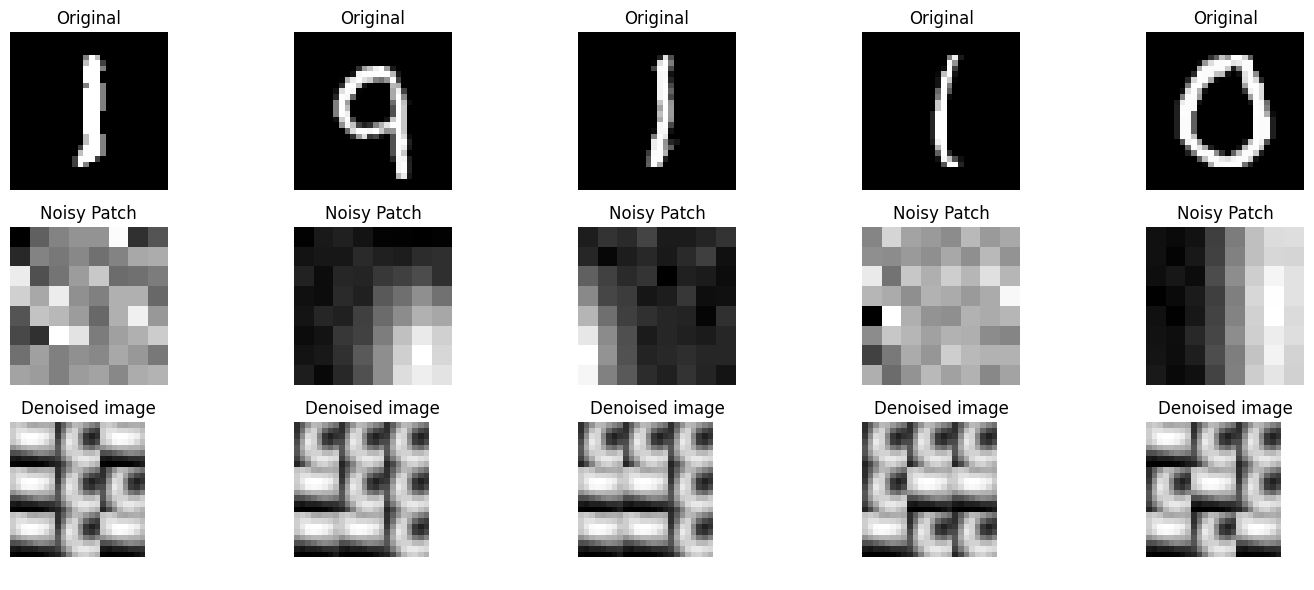

In [72]:
#denoised model
patch_size = 8
n_components = best_k

train_images = x_train  # Training images
test_images = y1  # Test images

train_patches = get_patches(train_images, patch_size)
test_patches = get_patches(test_images, patch_size)
gmm = train_gmm(train_patches, n_components)

denoised_test_patches = denoise_patches(test_patches, gmm)
denoised_test_patches_reshaped = reshape_patches(denoised_test_patches, patch_size)

image_shape = (28, 28)
denoised_test_images = reconstruct_images(denoised_test_patches_reshaped, image_shape, patch_size)

num_images_to_plot = 5
plt.figure(figsize=(15, 6))
for i in range(num_images_to_plot):
    # Original image
    plt.subplot(3, num_images_to_plot, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.axis('off')
    plt.title('Original')

    # Noisy image
    plt.subplot(3, num_images_to_plot, num_images_to_plot+i+1)
    plt.imshow(test_patches[i].astype(np.float32), cmap='gray')
    plt.axis('off')
    plt.title('Noisy Patch')

    # Denoised image
    plt.subplot(3, num_images_to_plot, 2*num_images_to_plot+i+1)
    plt.imshow(denoised_test_images[i].astype(np.float32), cmap='gray')
    plt.axis('off')
    plt.title('Denoised image')

plt.tight_layout()
plt.show()

<ipython-input-67-f646771c4acc>:18: RuntimeWarning: invalid value encountered in true_divide
  reconstructed_images /= count_map


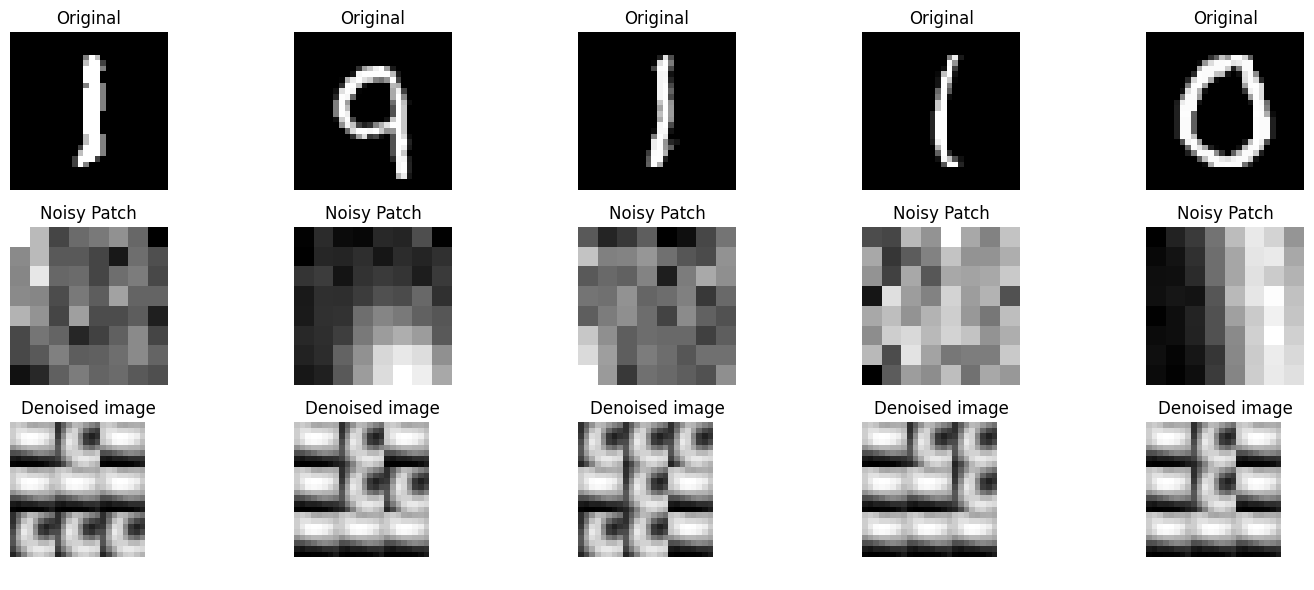

In [74]:
#test for patch_size=8
patch_size = 8
n_components = best_k

train_images = x_train  # Training images
test_images = yt  # Test images

train_patches = get_patches(train_images, patch_size)
test_patches = get_patches(test_images, patch_size)
gmm = train_gmm(train_patches, n_components)

denoised_test_patches = denoise_patches(test_patches, gmm)
denoised_test_patches_reshaped = reshape_patches(denoised_test_patches, patch_size)

image_shape = (28, 28)
denoised_test_images = reconstruct_images(denoised_test_patches_reshaped, image_shape, patch_size)

num_images_to_plot = 5
plt.figure(figsize=(15, 6))
for i in range(num_images_to_plot):
    # Original image
    plt.subplot(3, num_images_to_plot, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.axis('off')
    plt.title('Original')

    # Noisy image
    plt.subplot(3, num_images_to_plot, num_images_to_plot+i+1)
    plt.imshow(test_patches[i].astype(np.float32), cmap='gray')
    plt.axis('off')
    plt.title('Noisy Patch')

    # Denoised image
    plt.subplot(3, num_images_to_plot, 2*num_images_to_plot+i+1)
    plt.imshow(denoised_test_images[i].astype(np.float32), cmap='gray')
    plt.axis('off')
    plt.title('Denoised image')

plt.tight_layout()
plt.show()

In [142]:
#test for patch_size=4
lisd=[]
import io
# Open the zip file
with zipfile.ZipFile('corrupted_4.zip', 'r') as zip_ref:
    # Loop over all files in the zip archive
    for filename in zip_ref.namelist():
        # Check if the file is an image file
        if filename.endswith('.png') or filename.endswith('.jpg') or filename.endswith('.jpeg'):
            # Read the contents of the image file into a bytes object
            with zip_ref.open(filename, 'r') as file:
                img_bytes = file.read()

                # Load the image from the bytes object
                img = Image.open(io.BytesIO(img_bytes))
                arr=np.array(img)
                #print(arr)
                lisd.append(arr)


                # Display the image
                #img.show()
y2=np.array(lisd)


In [143]:
#test for patch_size=4
lise=[]
import io
# Open the zip file
with zipfile.ZipFile('corrupted_t4.zip', 'r') as zip_ref:
    # Loop over all files in the zip archive
    for filename in zip_ref.namelist():
        # Check if the file is an image file
        if filename.endswith('.png') or filename.endswith('.jpg') or filename.endswith('.jpeg'):
            # Read the contents of the image file into a bytes object
            with zip_ref.open(filename, 'r') as file:
                img_bytes = file.read()

                # Load the image from the bytes object
                img = Image.open(io.BytesIO(img_bytes))
                arr=np.array(img)
                #print(arr)
                lise.append(arr)


                # Display the image
                #img.show()
y3=np.array(lise)


In [81]:
patch_size=4
train_patches = get_patches(x_train, patch_size)
train_patches1=train_patches.reshape(train_patches.shape[0],train_patches.shape[1]**2)
# Select the optimal K using the validation set
max_k = 10  # Maximum value of K to consider
train_data, val_data = train_test_split(train_patches1, test_size=0.2, random_state=42)
best_k = select_optimal_k(max_k,val_data,patch_size,train_data)
print(best_k)
# Train the GMM with the optimal K on the entire dataset
gmm = train_gmm1(best_k, patch_size,train_data)

Log-Likelihood (Training): 0.0
Log-Likelihood (Validation) for K = 1 : 0.0
Log-Likelihood (Training): 1.1435297153639062e-14
Log-Likelihood (Validation) for K = 2 : 3.330669073875464e-15
Log-Likelihood (Training): 1.0280665208028076e-13
Log-Likelihood (Validation) for K = 3 : 7.216449660061388e-15
Log-Likelihood (Training): 8.082423619271e-14
Log-Likelihood (Validation) for K = 4 : 3.663735981262674e-15
Log-Likelihood (Training): 3.2218672174621386e-13
Log-Likelihood (Validation) for K = 5 : 1.8895995879119998e-13
Log-Likelihood (Training): 3.2107649872159e-13
Log-Likelihood (Validation) for K = 6 : 4.9293902293355575e-14
Log-Likelihood (Training): 1.7341683644643824e-13
Log-Likelihood (Validation) for K = 7 : 2.5757174171301025e-14
Log-Likelihood (Training): 1.5554224574997443e-13
Log-Likelihood (Validation) for K = 8 : 1.4444001550372994e-13
Log-Likelihood (Training): 4.1278092055562326e-13
Log-Likelihood (Validation) for K = 9 : 1.6364687382974555e-13
Log-Likelihood (Training): 1.77

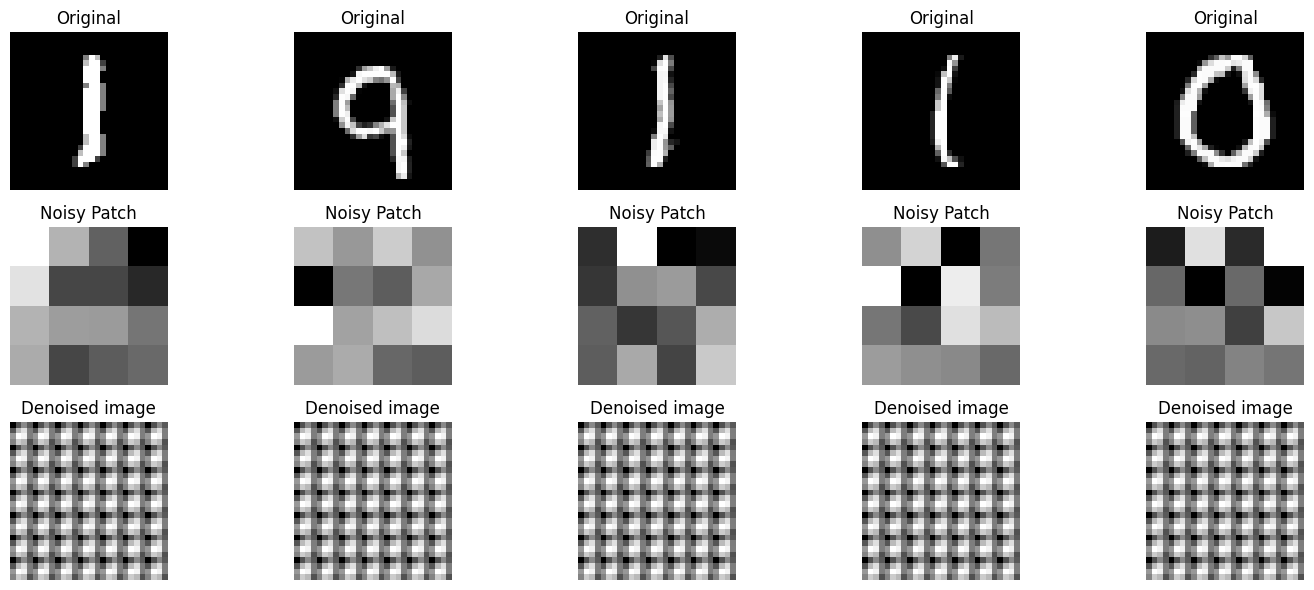

In [82]:
#denoised model
patch_size = 4
n_components = best_k

train_images = x_train  # Training images
test_images = y2  # Test images

train_patches = get_patches(train_images, patch_size)
test_patches = get_patches(test_images, patch_size)
gmm = train_gmm(train_patches, n_components)

denoised_test_patches = denoise_patches(test_patches, gmm)
denoised_test_patches_reshaped = reshape_patches(denoised_test_patches, patch_size)

image_shape = (28, 28)
denoised_test_images = reconstruct_images(denoised_test_patches_reshaped, image_shape, patch_size)

num_images_to_plot = 5
plt.figure(figsize=(15, 6))
for i in range(num_images_to_plot):
    # Original image
    plt.subplot(3, num_images_to_plot, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.axis('off')
    plt.title('Original')

    # Noisy image
    plt.subplot(3, num_images_to_plot, num_images_to_plot+i+1)
    plt.imshow(test_patches[i].astype(np.float32), cmap='gray')
    plt.axis('off')
    plt.title('Noisy Patch')

    # Denoised image
    plt.subplot(3, num_images_to_plot, 2*num_images_to_plot+i+1)
    plt.imshow(denoised_test_images[i].astype(np.float32), cmap='gray')
    plt.axis('off')
    plt.title('Denoised image')

plt.tight_layout()
plt.show()

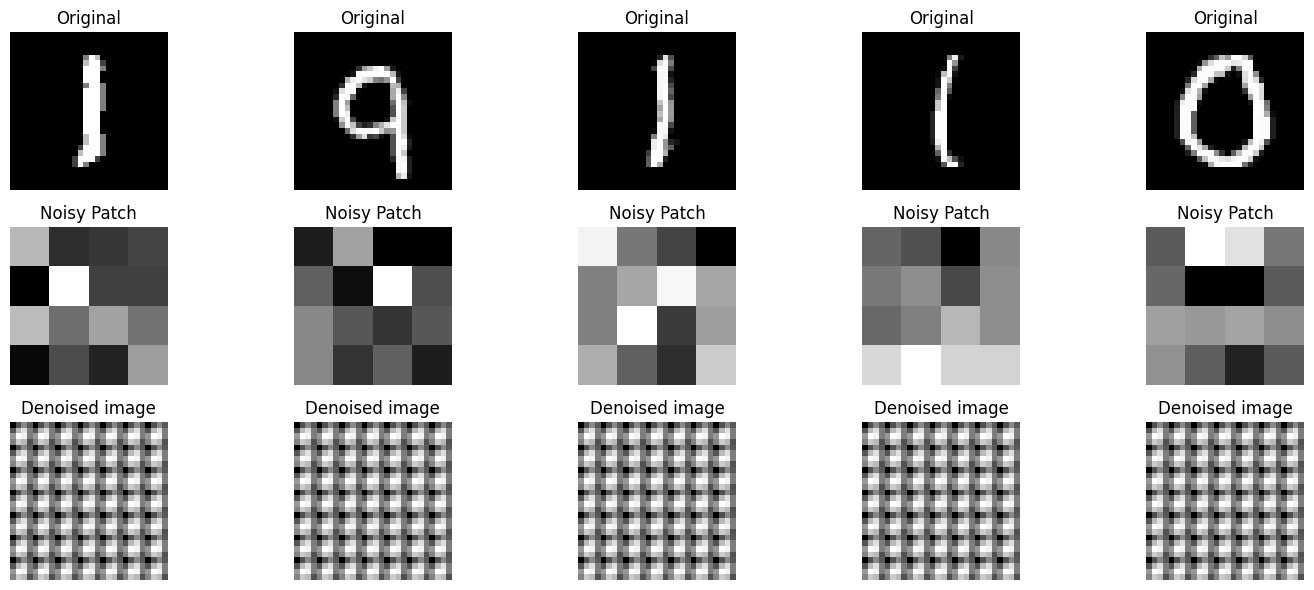

In [83]:
#test for patch_size=4
patch_size = 4
n_components = best_k

train_images = x_train  # Training images
test_images = y3  # Test images

train_patches = get_patches(train_images, patch_size)
test_patches = get_patches(test_images, patch_size)
gmm = train_gmm(train_patches, n_components)

denoised_test_patches = denoise_patches(test_patches, gmm)
denoised_test_patches_reshaped = reshape_patches(denoised_test_patches, patch_size)

image_shape = (28, 28)
denoised_test_images = reconstruct_images(denoised_test_patches_reshaped, image_shape, patch_size)

num_images_to_plot = 5
plt.figure(figsize=(15, 6))
for i in range(num_images_to_plot):
    # Original image
    plt.subplot(3, num_images_to_plot, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.axis('off')
    plt.title('Original')

    # Noisy image
    plt.subplot(3, num_images_to_plot, num_images_to_plot+i+1)
    plt.imshow(test_patches[i].astype(np.float32), cmap='gray')
    plt.axis('off')
    plt.title('Noisy Patch')

    # Denoised image
    plt.subplot(3, num_images_to_plot, 2*num_images_to_plot+i+1)
    plt.imshow(denoised_test_images[i].astype(np.float32), cmap='gray')
    plt.axis('off')
    plt.title('Denoised image')

plt.tight_layout()
plt.show()

In [144]:
#test for patch_size=12
lisf=[]
import io
# Open the zip file
with zipfile.ZipFile('corrupted_t12.zip', 'r') as zip_ref:
    # Loop over all files in the zip archive
    for filename in zip_ref.namelist():
        # Check if the file is an image file
        if filename.endswith('.png') or filename.endswith('.jpg') or filename.endswith('.jpeg'):
            # Read the contents of the image file into a bytes object
            with zip_ref.open(filename, 'r') as file:
                img_bytes = file.read()

                # Load the image from the bytes object
                img = Image.open(io.BytesIO(img_bytes))
                arr=np.array(img)
                #print(arr)
                lisf.append(arr)


                # Display the image
                #img.show()
y4=np.array(lisf)


In [145]:
#test for patch_size=12
lisg=[]
import io
# Open the zip file
with zipfile.ZipFile('corrupted_12.zip', 'r') as zip_ref:
    # Loop over all files in the zip archive
    for filename in zip_ref.namelist():
        # Check if the file is an image file
        if filename.endswith('.png') or filename.endswith('.jpg') or filename.endswith('.jpeg'):
            # Read the contents of the image file into a bytes object
            with zip_ref.open(filename, 'r') as file:
                img_bytes = file.read()

                # Load the image from the bytes object
                img = Image.open(io.BytesIO(img_bytes))
                arr=np.array(img)
                #print(arr)
                lisg.append(arr)


                # Display the image
                #img.show()
y5=np.array(lisg)


In [133]:
patch_size=12
train_patches = get_patches(x_train, patch_size)
train_patches1=train_patches.reshape(train_patches.shape[0],train_patches.shape[1]**2)
# Select the optimal K using the validation set
max_k = 10  # Maximum value of K to consider
train_data, val_data = train_test_split(train_patches1, test_size=0.2, random_state=42)
best_k = select_optimal_k(max_k,val_data,patch_size,train_data)
print(best_k)
# Train the GMM with the optimal K on the entire dataset
gmm = train_gmm1(best_k, patch_size,train_data)

Log-Likelihood (Training): 0.0
Log-Likelihood (Validation) for K = 1 : 0.0
Log-Likelihood (Training): 0.0
Log-Likelihood (Validation) for K = 2 : 2.9309887850103704e-14
Log-Likelihood (Training): 3.130828929442903e-14
Log-Likelihood (Validation) for K = 3 : -9.103828801926325e-15
Log-Likelihood (Training): -1.7097434579227556e-14
Log-Likelihood (Validation) for K = 4 : 0.0
Log-Likelihood (Training): -1.5987211554602567e-14
Log-Likelihood (Validation) for K = 5 : 1.4654943925052006e-14
Log-Likelihood (Training): 2.087219286295238e-14
Log-Likelihood (Validation) for K = 6 : 4.440892098500563e-14
Log-Likelihood (Training): -4.440892098502346e-16
Log-Likelihood (Validation) for K = 7 : 0.0
Log-Likelihood (Training): -9.547918011776394e-15
Log-Likelihood (Validation) for K = 8 : -3.075317778211715e-14
Log-Likelihood (Training): -6.883382752676053e-15
Log-Likelihood (Validation) for K = 9 : -1.2545520178264348e-14
Log-Likelihood (Training): 0.0
Log-Likelihood (Validation) for K = 10 : 0.0
6


<ipython-input-97-f646771c4acc>:18: RuntimeWarning: invalid value encountered in true_divide
  reconstructed_images /= count_map


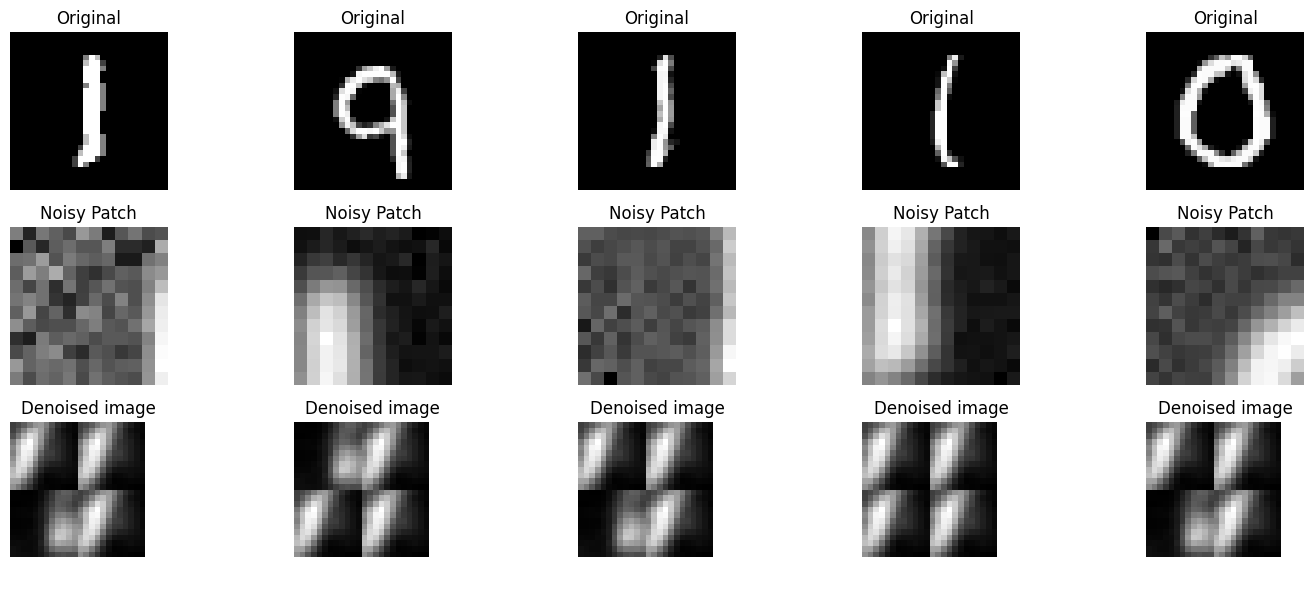

In [122]:
#denoised model
patch_size = 12
n_components = best_k

train_images = x_train  # Training images
test_images = y4  # Test images

train_patches = get_patches(train_images, patch_size)
test_patches = get_patches(test_images, patch_size)
gmm = train_gmm(train_patches, n_components)

denoised_test_patches = denoise_patches(test_patches, gmm)
denoised_test_patches_reshaped = reshape_patches(denoised_test_patches, patch_size)

image_shape = (28, 28)
denoised_test_images = reconstruct_images(denoised_test_patches_reshaped, image_shape, patch_size)

num_images_to_plot = 5
plt.figure(figsize=(15, 6))
for i in range(num_images_to_plot):
    # Original image
    plt.subplot(3, num_images_to_plot, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.axis('off')
    plt.title('Original')

    # Noisy image
    plt.subplot(3, num_images_to_plot, num_images_to_plot+i+1)
    plt.imshow(test_patches[i].astype(np.float32), cmap='gray')
    plt.axis('off')
    plt.title('Noisy Patch')

    # Denoised image
    plt.subplot(3, num_images_to_plot, 2*num_images_to_plot+i+1)
    plt.imshow(denoised_test_images[i].astype(np.float32), cmap='gray')
    plt.axis('off')
    plt.title('Denoised image')

plt.tight_layout()
plt.show()

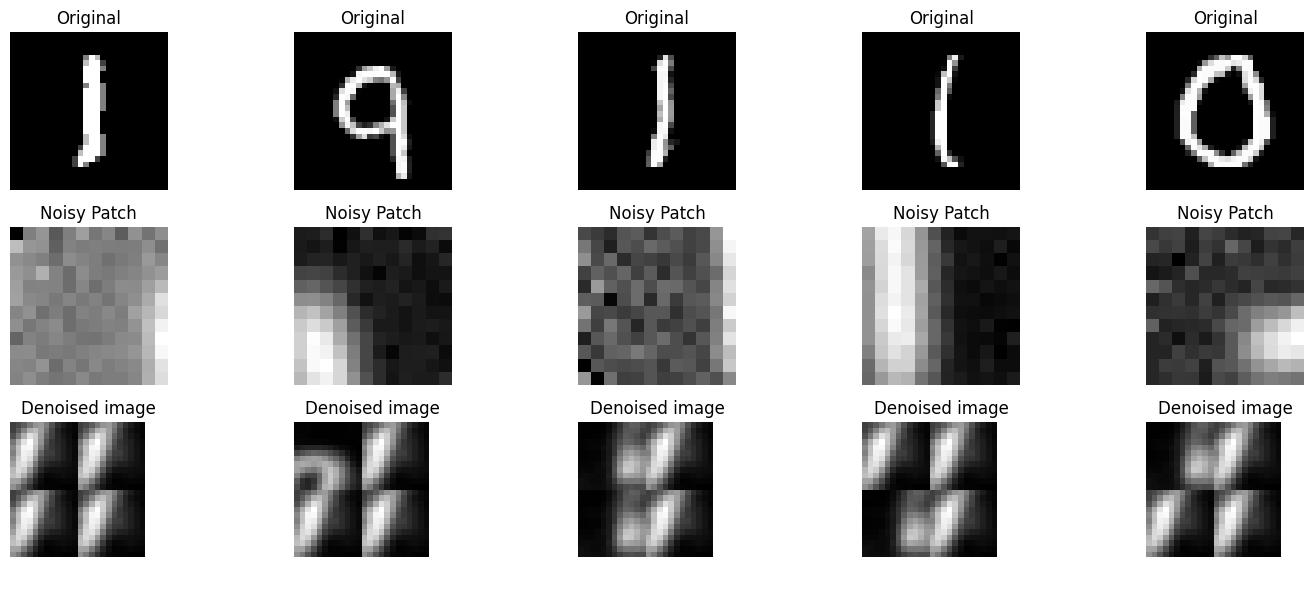

In [123]:
#test for patch_size=12
patch_size = 12
n_components = best_k

train_images = x_train  # Training images
test_images = y5  # Test images

train_patches = get_patches(train_images, patch_size)
test_patches = get_patches(test_images, patch_size)
gmm = train_gmm(train_patches, n_components)

denoised_test_patches = denoise_patches(test_patches, gmm)
denoised_test_patches_reshaped = reshape_patches(denoised_test_patches, patch_size)

image_shape = (28, 28)
denoised_test_images = reconstruct_images(denoised_test_patches_reshaped, image_shape, patch_size)

num_images_to_plot = 5
plt.figure(figsize=(15, 6))
for i in range(num_images_to_plot):
    # Original image
    plt.subplot(3, num_images_to_plot, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.axis('off')
    plt.title('Original')

    # Noisy image
    plt.subplot(3, num_images_to_plot, num_images_to_plot+i+1)
    plt.imshow(test_patches[i].astype(np.float32), cmap='gray')
    plt.axis('off')
    plt.title('Noisy Patch')

    # Denoised image
    plt.subplot(3, num_images_to_plot, 2*num_images_to_plot+i+1)
    plt.imshow(denoised_test_images[i].astype(np.float32), cmap='gray')
    plt.axis('off')
    plt.title('Denoised image')

plt.tight_layout()
plt.show()

In [146]:
#test for patch_size=16
lish=[]
import io
# Open the zip file
with zipfile.ZipFile('corrupted_t16.zip', 'r') as zip_ref:
    # Loop over all files in the zip archive
    for filename in zip_ref.namelist():
        # Check if the file is an image file
        if filename.endswith('.png') or filename.endswith('.jpg') or filename.endswith('.jpeg'):
            # Read the contents of the image file into a bytes object
            with zip_ref.open(filename, 'r') as file:
                img_bytes = file.read()

                # Load the image from the bytes object
                img = Image.open(io.BytesIO(img_bytes))
                arr=np.array(img)
                #print(arr)
                lish.append(arr)


                # Display the image
                #img.show()
y6=np.array(lish)



In [147]:
#test for patch_size=16
lisi=[]
import io
# Open the zip file
with zipfile.ZipFile('corrupted_16.zip', 'r') as zip_ref:
    # Loop over all files in the zip archive
    for filename in zip_ref.namelist():
        # Check if the file is an image file
        if filename.endswith('.png') or filename.endswith('.jpg') or filename.endswith('.jpeg'):
            # Read the contents of the image file into a bytes object
            with zip_ref.open(filename, 'r') as file:
                img_bytes = file.read()

                # Load the image from the bytes object
                img = Image.open(io.BytesIO(img_bytes))
                arr=np.array(img)
                #print(arr)
                lisi.append(arr)


                # Display the image
                #img.show()
y7=np.array(lisi)


In [134]:
patch_size=16
train_patches = get_patches(x_train, patch_size)
train_patches1=train_patches.reshape(train_patches.shape[0],train_patches.shape[1]**2)
# Select the optimal K using the validation set
max_k = 10  # Maximum value of K to consider
train_data, val_data = train_test_split(train_patches1, test_size=0.2, random_state=42)
best_k = select_optimal_k(max_k,val_data,patch_size,train_data)
print(best_k)
# Train the GMM with the optimal K on the entire dataset
gmm = train_gmm1(best_k, patch_size,train_data)

Log-Likelihood (Training): 0.0
Log-Likelihood (Validation) for K = 1 : 0.0
Log-Likelihood (Training): 0.0
Log-Likelihood (Validation) for K = 2 : 0.0
Log-Likelihood (Training): 0.0
Log-Likelihood (Validation) for K = 3 : 0.0
Log-Likelihood (Training): 0.0
Log-Likelihood (Validation) for K = 4 : 0.0
Log-Likelihood (Training): 0.0
Log-Likelihood (Validation) for K = 5 : 0.0
Log-Likelihood (Training): 0.0
Log-Likelihood (Validation) for K = 6 : 0.0
Log-Likelihood (Training): 0.0
Log-Likelihood (Validation) for K = 7 : 0.0
Log-Likelihood (Training): 0.0
Log-Likelihood (Validation) for K = 8 : 0.0
Log-Likelihood (Training): 0.0
Log-Likelihood (Validation) for K = 9 : 0.0
Log-Likelihood (Training): 0.0
Log-Likelihood (Validation) for K = 10 : 0.0
1
Log-Likelihood (Training): 0.0


<ipython-input-97-f646771c4acc>:18: RuntimeWarning: invalid value encountered in true_divide
  reconstructed_images /= count_map


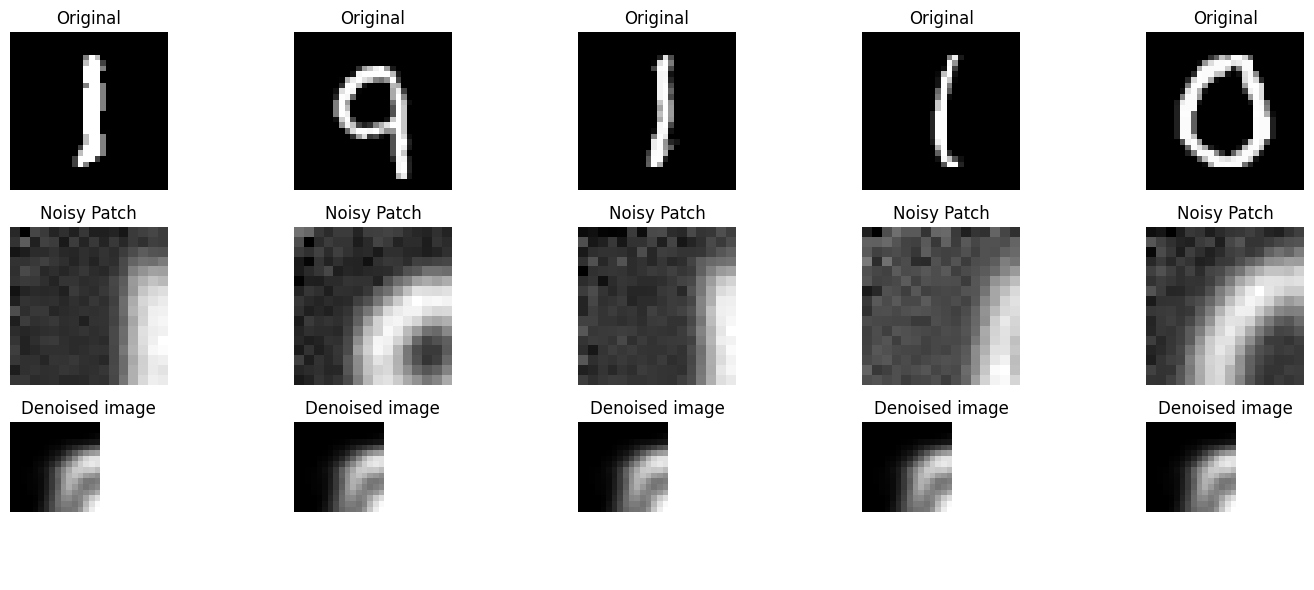

In [98]:
#denoised model
patch_size = 16
n_components = best_k

train_images = x_train  # Training images
test_images = y6  # Test images

train_patches = get_patches(train_images, patch_size)
test_patches = get_patches(test_images, patch_size)
gmm = train_gmm(train_patches, n_components)

denoised_test_patches = denoise_patches(test_patches, gmm)
denoised_test_patches_reshaped = reshape_patches(denoised_test_patches, patch_size)

image_shape = (28, 28)
denoised_test_images = reconstruct_images(denoised_test_patches_reshaped, image_shape, patch_size)

num_images_to_plot = 5
plt.figure(figsize=(15, 6))
for i in range(num_images_to_plot):
    # Original image
    plt.subplot(3, num_images_to_plot, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.axis('off')
    plt.title('Original')

    # Noisy image
    plt.subplot(3, num_images_to_plot, num_images_to_plot+i+1)
    plt.imshow(test_patches[i].astype(np.float32), cmap='gray')
    plt.axis('off')
    plt.title('Noisy Patch')

    # Denoised image
    plt.subplot(3, num_images_to_plot, 2*num_images_to_plot+i+1)
    plt.imshow(denoised_test_images[i].astype(np.float32), cmap='gray')
    plt.axis('off')
    plt.title('Denoised image')

plt.tight_layout()
plt.show()

<ipython-input-97-f646771c4acc>:18: RuntimeWarning: invalid value encountered in true_divide
  reconstructed_images /= count_map


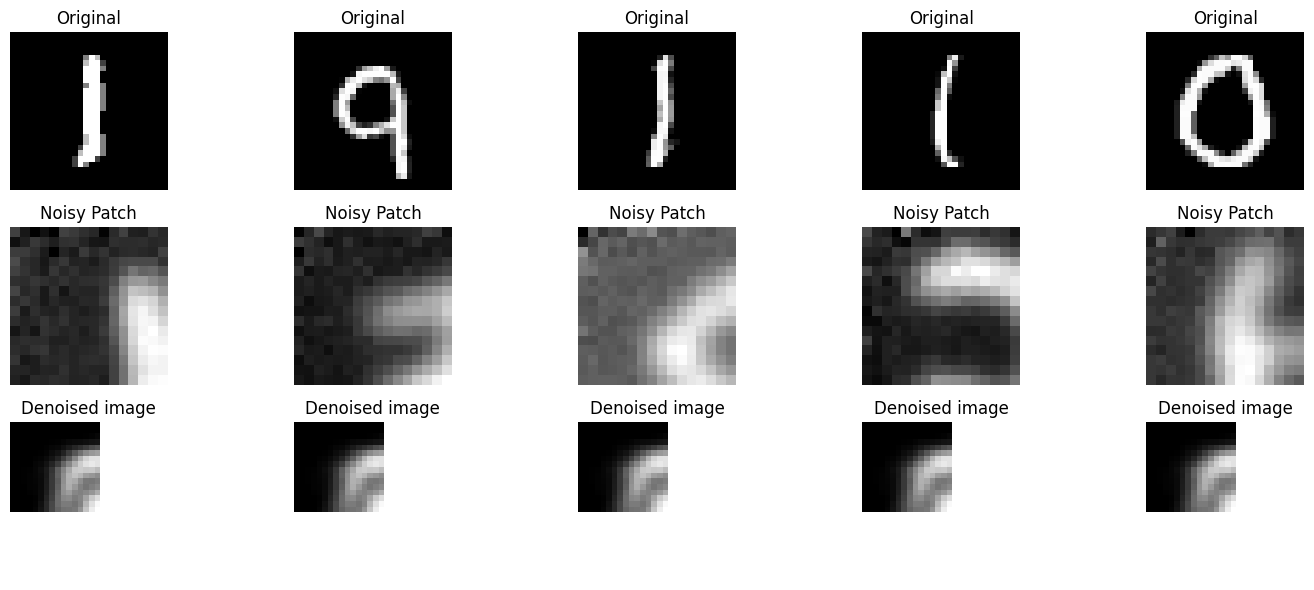

In [100]:
#test for patch_size=16
patch_size = 16
n_components = best_k

train_images = x_train  # Training images
test_images = y7  # Test images

train_patches = get_patches(train_images, patch_size)
test_patches = get_patches(test_images, patch_size)
gmm = train_gmm(train_patches, n_components)

denoised_test_patches = denoise_patches(test_patches, gmm)
denoised_test_patches_reshaped = reshape_patches(denoised_test_patches, patch_size)

image_shape = (28, 28)
denoised_test_images = reconstruct_images(denoised_test_patches_reshaped, image_shape, patch_size)

num_images_to_plot = 5
plt.figure(figsize=(15, 6))
for i in range(num_images_to_plot):
    # Original image
    plt.subplot(3, num_images_to_plot, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.axis('off')
    plt.title('Original')

    # Noisy image
    plt.subplot(3, num_images_to_plot, num_images_to_plot+i+1)
    plt.imshow(test_patches[i].astype(np.float32), cmap='gray')
    plt.axis('off')
    plt.title('Noisy Patch')

    # Denoised image
    plt.subplot(3, num_images_to_plot, 2*num_images_to_plot+i+1)
    plt.imshow(denoised_test_images[i].astype(np.float32), cmap='gray')
    plt.axis('off')
    plt.title('Denoised image')

plt.tight_layout()
plt.show()

In [148]:
#test for patch_size=20
lisj=[]
import io
# Open the zip file
with zipfile.ZipFile('corrupted_t20.zip', 'r') as zip_ref:
    # Loop over all files in the zip archive
    for filename in zip_ref.namelist():
        # Check if the file is an image file
        if filename.endswith('.png') or filename.endswith('.jpg') or filename.endswith('.jpeg'):
            # Read the contents of the image file into a bytes object
            with zip_ref.open(filename, 'r') as file:
                img_bytes = file.read()

                # Load the image from the bytes object
                img = Image.open(io.BytesIO(img_bytes))
                arr=np.array(img)
                #print(arr)
                lisj.append(arr)


                # Display the image
                #img.show()
y8=np.array(lisj)



In [149]:
#test for patch_size=20
lisk=[]
import io
# Open the zip file
with zipfile.ZipFile('corrupted_t20.zip', 'r') as zip_ref:
    # Loop over all files in the zip archive
    for filename in zip_ref.namelist():
        # Check if the file is an image file
        if filename.endswith('.png') or filename.endswith('.jpg') or filename.endswith('.jpeg'):
            # Read the contents of the image file into a bytes object
            with zip_ref.open(filename, 'r') as file:
                img_bytes = file.read()

                # Load the image from the bytes object
                img = Image.open(io.BytesIO(img_bytes))
                arr=np.array(img)
                #print(arr)
                lisk.append(arr)


                # Display the image
                #img.show()
y9=np.array(lisk)



In [125]:
patch_size=20
train_patches = get_patches(x_train, patch_size)
train_patches1=train_patches.reshape(train_patches.shape[0],train_patches.shape[1]**2)
# Select the optimal K using the validation set
max_k = 10  # Maximum value of K to consider
train_data, val_data = train_test_split(train_patches1, test_size=0.2, random_state=42)
best_k = select_optimal_k(max_k,val_data,patch_size,train_data)
print(best_k)
# Train the GMM with the optimal K on the entire dataset
gmm = train_gmm1(best_k, patch_size,train_data)

Log-Likelihood (Training): 0.0
Log-Likelihood (Validation) for K = 1 : 0.0
Log-Likelihood (Training): 0.0
Log-Likelihood (Validation) for K = 2 : 0.0
Log-Likelihood (Training): 0.0
Log-Likelihood (Validation) for K = 3 : 0.0
Log-Likelihood (Training): 0.0
Log-Likelihood (Validation) for K = 4 : 0.0
Log-Likelihood (Training): 0.0
Log-Likelihood (Validation) for K = 5 : 0.0
Log-Likelihood (Training): 0.0
Log-Likelihood (Validation) for K = 6 : 0.0
Log-Likelihood (Training): 0.0
Log-Likelihood (Validation) for K = 7 : 0.0
Log-Likelihood (Training): 0.0
Log-Likelihood (Validation) for K = 8 : 0.0
Log-Likelihood (Training): 0.0
Log-Likelihood (Validation) for K = 9 : 0.0
Log-Likelihood (Training): 0.0
Log-Likelihood (Validation) for K = 10 : 0.0
1
Log-Likelihood (Training): 0.0


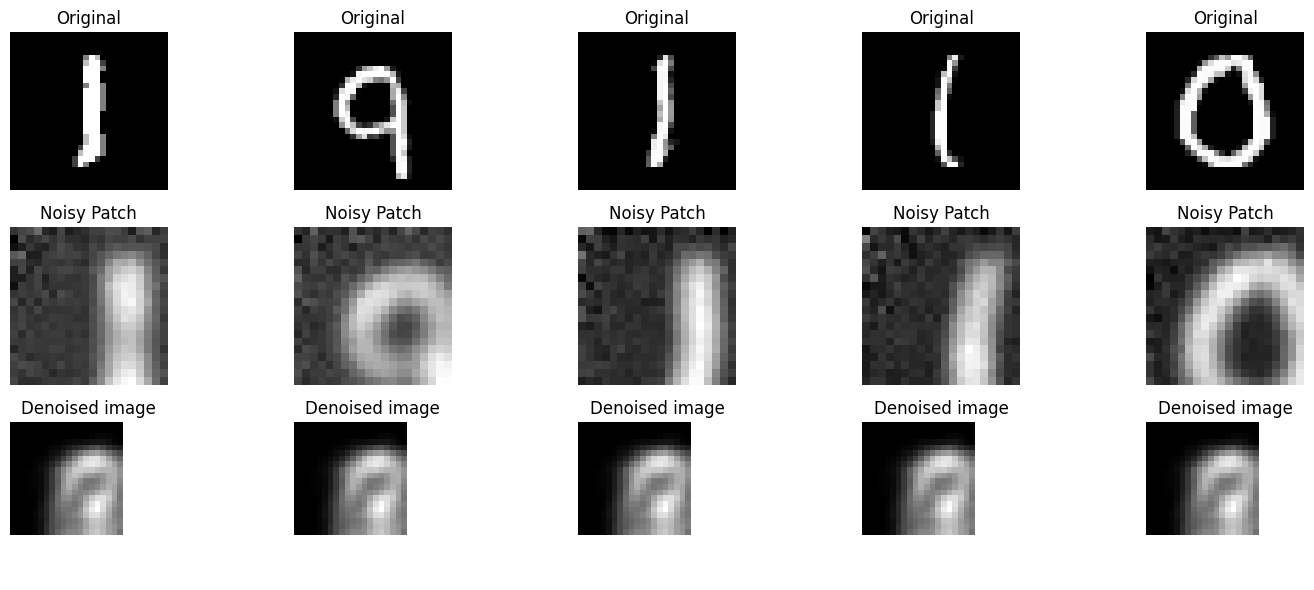

In [126]:
#denoised model
patch_size = 20
n_components = best_k

train_images = x_train  # Training images
test_images = y8  # Test images

train_patches = get_patches(train_images, patch_size)
test_patches = get_patches(test_images, patch_size)
gmm = train_gmm(train_patches, n_components)

denoised_test_patches = denoise_patches(test_patches, gmm)
denoised_test_patches_reshaped = reshape_patches(denoised_test_patches, patch_size)

image_shape = (28, 28)
denoised_test_images = reconstruct_images(denoised_test_patches_reshaped, image_shape, patch_size)

num_images_to_plot = 5
plt.figure(figsize=(15, 6))
for i in range(num_images_to_plot):
    # Original image
    plt.subplot(3, num_images_to_plot, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.axis('off')
    plt.title('Original')

    # Noisy image
    plt.subplot(3, num_images_to_plot, num_images_to_plot+i+1)
    plt.imshow(test_patches[i].astype(np.float32), cmap='gray')
    plt.axis('off')
    plt.title('Noisy Patch')

    # Denoised image
    plt.subplot(3, num_images_to_plot, 2*num_images_to_plot+i+1)
    plt.imshow(denoised_test_images[i].astype(np.float32), cmap='gray')
    plt.axis('off')
    plt.title('Denoised image')

plt.tight_layout()
plt.show()

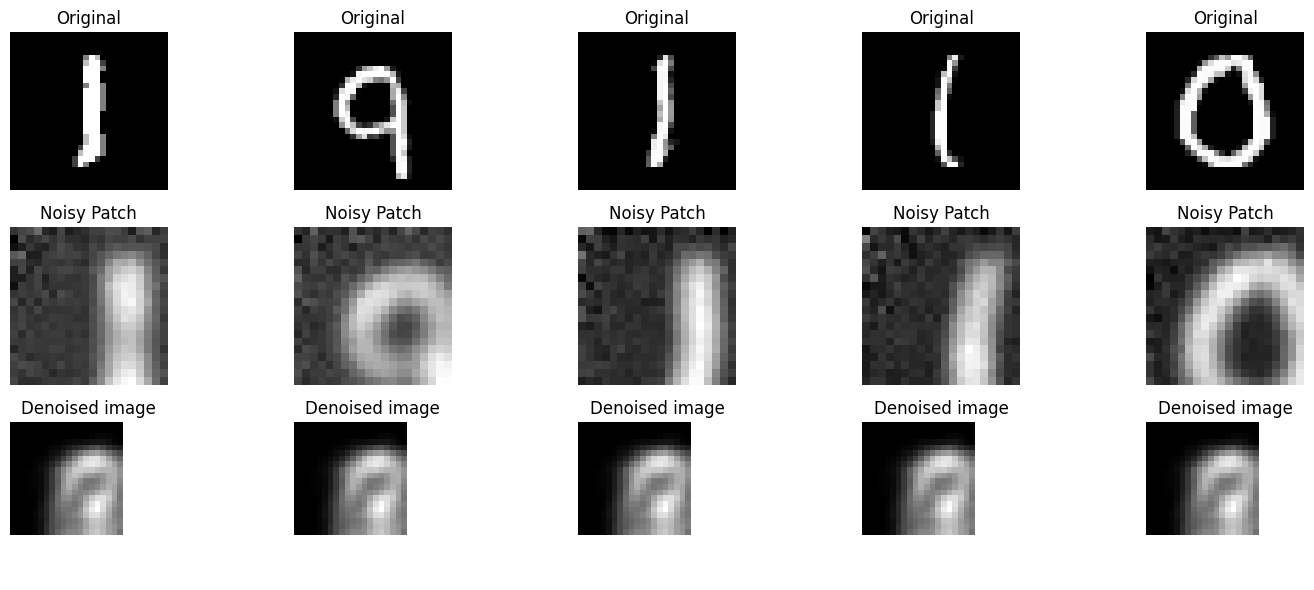

In [127]:
#test for patch_size=20
patch_size = 20
n_components = best_k

train_images = x_train  # Training images
test_images = y9  # Test images

train_patches = get_patches(train_images, patch_size)
test_patches = get_patches(test_images, patch_size)
gmm = train_gmm(train_patches, n_components)

denoised_test_patches = denoise_patches(test_patches, gmm)
denoised_test_patches_reshaped = reshape_patches(denoised_test_patches, patch_size)

image_shape = (28, 28)
denoised_test_images = reconstruct_images(denoised_test_patches_reshaped, image_shape, patch_size)

num_images_to_plot = 5
plt.figure(figsize=(15, 6))
for i in range(num_images_to_plot):
    # Original image
    plt.subplot(3, num_images_to_plot, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.axis('off')
    plt.title('Original')

    # Noisy image
    plt.subplot(3, num_images_to_plot, num_images_to_plot+i+1)
    plt.imshow(test_patches[i].astype(np.float32), cmap='gray')
    plt.axis('off')
    plt.title('Noisy Patch')

    # Denoised image
    plt.subplot(3, num_images_to_plot, 2*num_images_to_plot+i+1)
    plt.imshow(denoised_test_images[i].astype(np.float32), cmap='gray')
    plt.axis('off')
    plt.title('Denoised image')

plt.tight_layout()
plt.show()

In [150]:
#test for patch_size=28
lisl=[]
import io
# Open the zip file
with zipfile.ZipFile('corrupted_t28.zip', 'r') as zip_ref:
    # Loop over all files in the zip archive
    for filename in zip_ref.namelist():
        # Check if the file is an image file
        if filename.endswith('.png') or filename.endswith('.jpg') or filename.endswith('.jpeg'):
            # Read the contents of the image file into a bytes object
            with zip_ref.open(filename, 'r') as file:
                img_bytes = file.read()

                # Load the image from the bytes object
                img = Image.open(io.BytesIO(img_bytes))
                arr=np.array(img)
                #print(arr)
                lisl.append(arr)


                # Display the image
                #img.show()
y10=np.array(lisl)



In [151]:
#test for patch_size=28
lism=[]
import io
# Open the zip file
with zipfile.ZipFile('corrupted_28.zip', 'r') as zip_ref:
    # Loop over all files in the zip archive
    for filename in zip_ref.namelist():
        # Check if the file is an image file
        if filename.endswith('.png') or filename.endswith('.jpg') or filename.endswith('.jpeg'):
            # Read the contents of the image file into a bytes object
            with zip_ref.open(filename, 'r') as file:
                img_bytes = file.read()

                # Load the image from the bytes object
                img = Image.open(io.BytesIO(img_bytes))
                arr=np.array(img)
                #print(arr)
                lism.append(arr)


                # Display the image
                #img.show()
y11=np.array(lism)



In [129]:
patch_size=28
train_patches = get_patches(x_train, patch_size)
train_patches1=train_patches.reshape(train_patches.shape[0],train_patches.shape[1]**2)
# Select the optimal K using the validation set
max_k = 10  # Maximum value of K to consider
train_data, val_data = train_test_split(train_patches1, test_size=0.2, random_state=42)
best_k = select_optimal_k(max_k,val_data,patch_size,train_data)
print(best_k)
# Train the GMM with the optimal K on the entire dataset
gmm = train_gmm1(best_k, patch_size,train_data)

Log-Likelihood (Training): 0.0
Log-Likelihood (Validation) for K = 1 : 0.0
Log-Likelihood (Training): 0.0
Log-Likelihood (Validation) for K = 2 : 0.0
Log-Likelihood (Training): 0.0
Log-Likelihood (Validation) for K = 3 : 0.0
Log-Likelihood (Training): 0.0
Log-Likelihood (Validation) for K = 4 : 0.0
Log-Likelihood (Training): 0.0
Log-Likelihood (Validation) for K = 5 : 0.0
Log-Likelihood (Training): 0.0
Log-Likelihood (Validation) for K = 6 : 0.0
Log-Likelihood (Training): 0.0
Log-Likelihood (Validation) for K = 7 : 0.0
Log-Likelihood (Training): 0.0
Log-Likelihood (Validation) for K = 8 : 0.0
Log-Likelihood (Training): 0.0
Log-Likelihood (Validation) for K = 9 : 0.0
Log-Likelihood (Training): 0.0
Log-Likelihood (Validation) for K = 10 : 0.0
1
Log-Likelihood (Training): 0.0


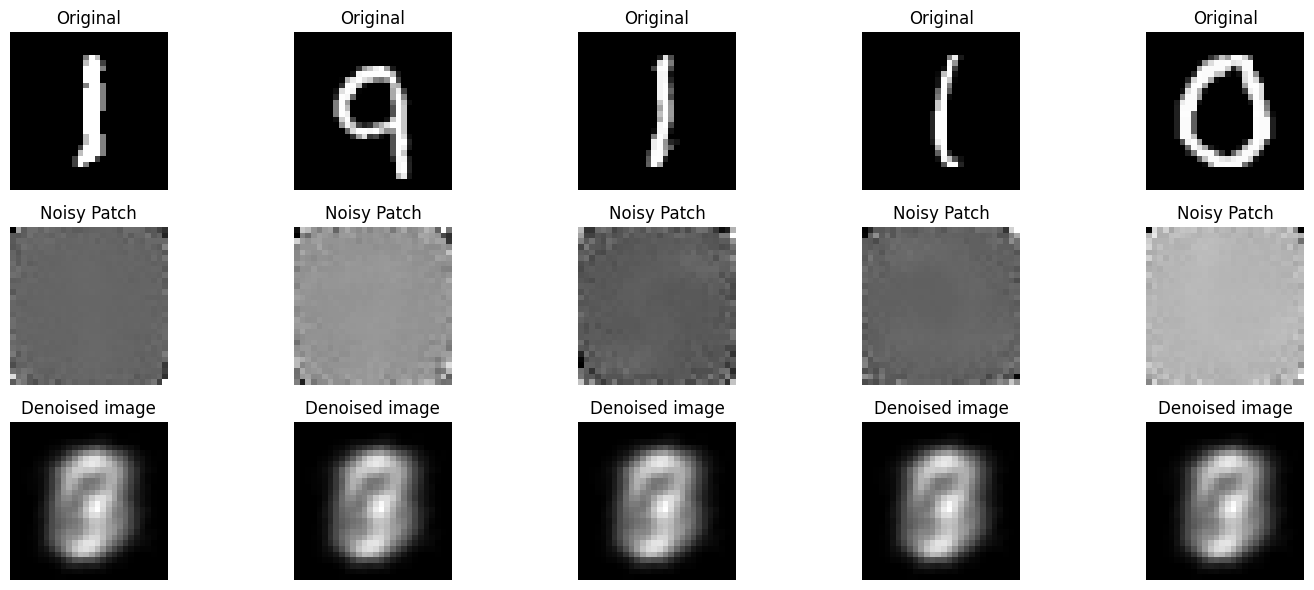

In [130]:
#denoised model
patch_size = 28
n_components = best_k

train_images = x_train  # Training images
test_images = y10  # Test images

train_patches = get_patches(train_images, patch_size)
test_patches = get_patches(test_images, patch_size)
gmm = train_gmm(train_patches, n_components)

denoised_test_patches = denoise_patches(test_patches, gmm)
denoised_test_patches_reshaped = reshape_patches(denoised_test_patches, patch_size)

image_shape = (28, 28)
denoised_test_images = reconstruct_images(denoised_test_patches_reshaped, image_shape, patch_size)

num_images_to_plot = 5
plt.figure(figsize=(15, 6))
for i in range(num_images_to_plot):
    # Original image
    plt.subplot(3, num_images_to_plot, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.axis('off')
    plt.title('Original')

    # Noisy image
    plt.subplot(3, num_images_to_plot, num_images_to_plot+i+1)
    plt.imshow(test_patches[i].astype(np.float32), cmap='gray')
    plt.axis('off')
    plt.title('Noisy Patch')

    # Denoised image
    plt.subplot(3, num_images_to_plot, 2*num_images_to_plot+i+1)
    plt.imshow(denoised_test_images[i].astype(np.float32), cmap='gray')
    plt.axis('off')
    plt.title('Denoised image')

plt.tight_layout()
plt.show()

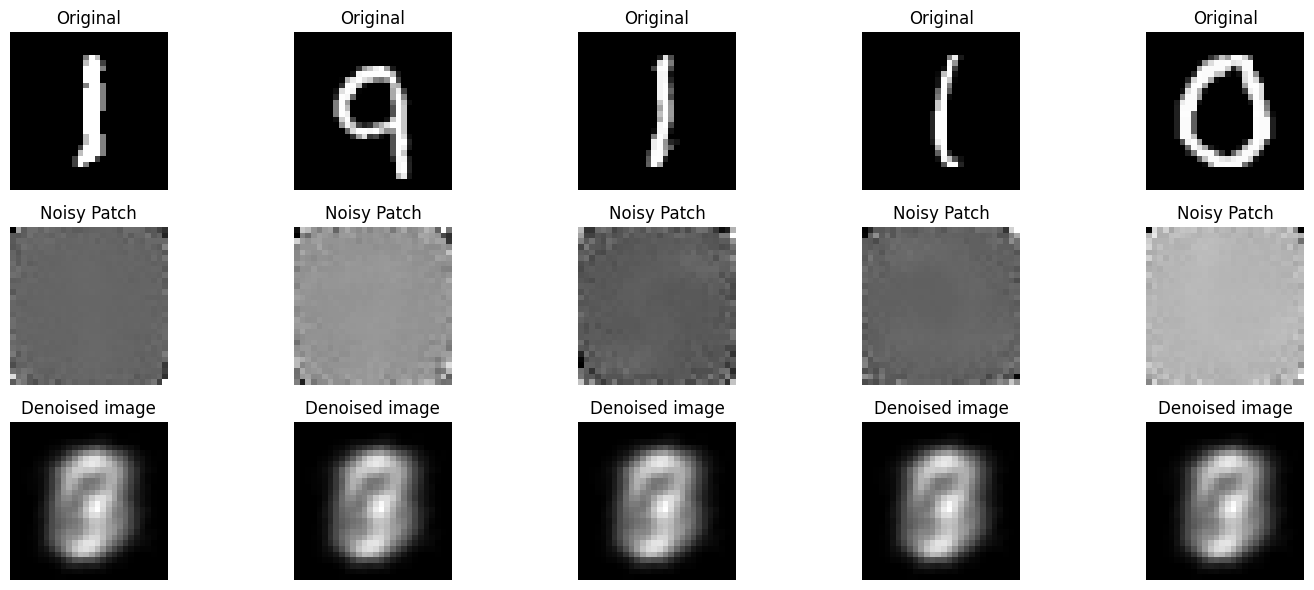

In [131]:
#test for patch_size=28
patch_size = 28
n_components = best_k

train_images = x_train  # Training images
test_images = y11  # Test images

train_patches = get_patches(train_images, patch_size)
test_patches = get_patches(test_images, patch_size)
gmm = train_gmm(train_patches, n_components)

denoised_test_patches = denoise_patches(test_patches, gmm)
denoised_test_patches_reshaped = reshape_patches(denoised_test_patches, patch_size)

image_shape = (28, 28)
denoised_test_images = reconstruct_images(denoised_test_patches_reshaped, image_shape, patch_size)

num_images_to_plot = 5
plt.figure(figsize=(15, 6))
for i in range(num_images_to_plot):
    # Original image
    plt.subplot(3, num_images_to_plot, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.axis('off')
    plt.title('Original')

    # Noisy image
    plt.subplot(3, num_images_to_plot, num_images_to_plot+i+1)
    plt.imshow(test_patches[i].astype(np.float32), cmap='gray')
    plt.axis('off')
    plt.title('Noisy Patch')

    # Denoised image
    plt.subplot(3, num_images_to_plot, 2*num_images_to_plot+i+1)
    plt.imshow(denoised_test_images[i].astype(np.float32), cmap='gray')
    plt.axis('off')
    plt.title('Denoised image')

plt.tight_layout()
plt.show()

I really tried my best to get a good result😢